In [2]:
import cv2
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import random
import time
import pylab as pl
from sklearn.metrics import confusion_matrix,accuracy_score
import pydicom
from tqdm import tqdm
import pandas as pd
from matplotlib import pyplot as plt
import os
import time
import numpy as np
import cv2
import numpy as np

In [3]:
train_path="E:/dataset/train/train"
class_names=os.listdir(train_path)
class_names

['1',
 '10',
 '1000',
 '1002',
 '1004',
 '1005',
 '1006',
 '1007',
 '1008',
 '1009',
 '101',
 '1011',
 '1014',
 '1016',
 '1019',
 '102',
 '1020',
 '1024',
 '1025',
 '1026',
 '1028',
 '1029',
 '1032',
 '1033',
 '1034',
 '1035',
 '1036',
 '1037',
 '1039',
 '104',
 '1040',
 '1041',
 '1042',
 '1043',
 '1044',
 '1046',
 '105',
 '1050',
 '1051',
 '1052',
 '1053',
 '1055',
 '106',
 '1060',
 '1063',
 '1066',
 '107',
 '1070',
 '1071',
 '1072',
 '1073',
 '1074',
 '1075',
 '1076',
 '1077',
 '1078',
 '1079',
 '108',
 '1080',
 '1082',
 '1083',
 '1084',
 '1085',
 '1086',
 '1088',
 '109',
 '1090',
 '1094',
 '1096',
 '1097',
 '1098',
 '1100',
 '1104',
 '1105',
 '1106',
 '1108',
 '1109',
 '111',
 '1111',
 '1115',
 '1116',
 '1117',
 '1118',
 '1119',
 '1120',
 '1121',
 '1122',
 '1123',
 '1124',
 '1126',
 '1128',
 '1129',
 '113',
 '1130',
 '1131',
 '1133',
 '1135',
 '1138',
 '1139',
 '1140',
 '1141',
 '1142',
 '1143',
 '1144',
 '1145',
 '1148',
 '1149',
 '115',
 '1150',
 '1152',
 '1153',
 '1157',
 '1158',

In [4]:
def img_list(path):
    return (os.path.join(path,f) for f in os.listdir(path))

In [6]:
print(img_list(r'C:\Users\D. RHUTHVIK\OneDrive\Pictures\Screenshots'))

<generator object img_list.<locals>.<genexpr> at 0x000001AEF2904820>


In [7]:
for i in img_list(r'C:\Users\D. RHUTHVIK\OneDrive\Pictures\Screenshots'):
    print(i)

C:\Users\D. RHUTHVIK\OneDrive\Pictures\Screenshots\2022-01-11 (1).png
C:\Users\D. RHUTHVIK\OneDrive\Pictures\Screenshots\2022-01-11 (2).png
C:\Users\D. RHUTHVIK\OneDrive\Pictures\Screenshots\2022-01-11 (3).png
C:\Users\D. RHUTHVIK\OneDrive\Pictures\Screenshots\2022-01-11 (4).png
C:\Users\D. RHUTHVIK\OneDrive\Pictures\Screenshots\2022-01-11 (5).png
C:\Users\D. RHUTHVIK\OneDrive\Pictures\Screenshots\2022-01-11 (6).png
C:\Users\D. RHUTHVIK\OneDrive\Pictures\Screenshots\2022-01-11 (7).png
C:\Users\D. RHUTHVIK\OneDrive\Pictures\Screenshots\2022-01-11 (8).png
C:\Users\D. RHUTHVIK\OneDrive\Pictures\Screenshots\2022-01-11.png
C:\Users\D. RHUTHVIK\OneDrive\Pictures\Screenshots\2022-01-25 (1).png
C:\Users\D. RHUTHVIK\OneDrive\Pictures\Screenshots\2022-01-25 (2).png
C:\Users\D. RHUTHVIK\OneDrive\Pictures\Screenshots\2022-01-25.png
C:\Users\D. RHUTHVIK\OneDrive\Pictures\Screenshots\2022-01-26.png
C:\Users\D. RHUTHVIK\OneDrive\Pictures\Screenshots\2022-02-03 (1).png
C:\Users\D. RHUTHVIK\OneDrive\Pi

In [10]:
a=[0]*3

In [11]:
b=[1]*3

In [12]:
y=a+b
y

[0, 0, 0, 1, 1, 1]

In [16]:
train_path=r"C:\Users\D. RHUTHVIK\OneDrive\Pictures"
class_names=os.listdir(train_path)

In [17]:
print(class_names)

['dog', 'Screenshots']


In [18]:
image_paths=[]
image_classes=[]

In [19]:
def img_list(path):
    return (os.path.join(path,f) for f in os.listdir(path))

In [20]:
for training_name in class_names:
    dir_=os.path.join(train_path,training_name)
    class_path=img_list(dir_)
    image_paths+=class_path

In [22]:
type(image_paths)

list

In [ ]:
for i in range(len(image_paths)):
    D.append((image_paths[i],image_classes[i]))

In [23]:
image_classes_0=[0]*(len(image_paths)//2)

In [24]:
image_classes_1=[1]*(len(image_paths)//2)

In [25]:
image_classes=image_classes_0+image_classes_1

In [30]:
image_classes+=[0]

In [31]:
print(len(image_classes))
print(len(image_paths))

215
215


In [32]:
D=[]
for i in range(len(image_paths)):
    D.append((image_paths[i],image_classes[i]))

In [132]:
type(D)

list

In [35]:
dataset = D
random.shuffle(dataset)
train = dataset[:180]
test = dataset[180:]

image_paths, y_train = zip(*train)
image_paths_test, y_test = zip(*test)

In [36]:
des_list=[]

In [37]:
orb=cv2.ORB_create()

In [45]:
im=cv2.imread(image_paths[1])

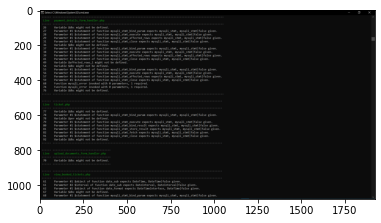

In [46]:
plt.imshow(im)

In [47]:
for image_pat in image_paths:
    im=cv2.imread(image_pat)
    kp=orb.detect(im,None)
    keypoints,descriptor= orb.compute(im, kp)
    des_list.append((image_pat,descriptor))

In [48]:
descriptors=des_list[0][1]
for image_path,descriptor in des_list[1:]:
    descriptors=np.vstack((descriptors,descriptor))

In [49]:
descriptors.shape

(90388, 32)

In [50]:
descriptors_float=descriptors.astype(float)

In [51]:
from scipy.cluster.vq import kmeans,vq

In [52]:
k=200
voc,variance=kmeans(descriptors_float,k,1)

In [53]:
im_features=np.zeros((len(image_paths),k),"float32")
for i in range(len(image_paths)):
    words,distance=vq(des_list[i][1],voc)
    for w in words:
        im_features[i][w]+=1

In [54]:
from sklearn.preprocessing import StandardScaler
stdslr=StandardScaler().fit(im_features)
im_features=stdslr.transform(im_features)

In [55]:
from sklearn.svm import LinearSVC
clf=LinearSVC(max_iter=80000)
clf.fit(im_features,np.array(y_train))

LinearSVC(max_iter=80000)

In [56]:
des_list_test=[]

In [57]:
for image_pat in image_paths_test:
    image=cv2.imread(image_pat)
    kp=orb.detect(image,None)
    keypoints_test,descriptor_test= orb.compute(image, kp)
    des_list_test.append((image_pat,descriptor_test))

In [58]:
len(image_paths_test)

35

In [59]:
from scipy.cluster.vq import vq
test_features=np.zeros((len(image_paths_test),k),"float32")
for i in range(len(image_paths_test)):
    words,distance=vq(des_list_test[i][1],voc)
    for w in words:
        test_features[i][w]+=1

In [60]:
test_features


array([[ 0.,  4.,  6., ...,  0.,  6.,  5.],
       [ 0.,  4.,  5., ...,  1.,  6.,  3.],
       [ 0.,  1.,  7., ...,  0.,  0.,  3.],
       ...,
       [ 0.,  4., 10., ...,  1.,  8.,  0.],
       [ 0.,  6.,  9., ...,  0.,  5.,  0.],
       [ 0.,  1.,  2., ...,  0.,  2.,  0.]], dtype=float32)

In [61]:
test_features=stdslr.transform(test_features)

In [62]:
true_classes=[]
for i in y_test:
    if i==1:
        true_classes.append("Cat")
    else:
        true_classes.append("Dog")

In [63]:
predict_classes=[]
for i in clf.predict(test_features):
    if i==1:
        predict_classes.append("Cat")
    else:
        predict_classes.append("Dog")

In [64]:
print(true_classes)

['Dog', 'Cat', 'Cat', 'Dog', 'Cat', 'Cat', 'Cat', 'Cat', 'Dog', 'Cat', 'Cat', 'Dog', 'Cat', 'Cat', 'Dog', 'Dog', 'Dog', 'Dog', 'Dog', 'Dog', 'Dog', 'Dog', 'Cat', 'Cat', 'Cat', 'Dog', 'Cat', 'Cat', 'Cat', 'Dog', 'Dog', 'Dog', 'Dog', 'Cat', 'Dog']


In [65]:
print(predict_classes)

['Dog', 'Cat', 'Cat', 'Dog', 'Cat', 'Cat', 'Cat', 'Cat', 'Dog', 'Cat', 'Cat', 'Dog', 'Cat', 'Cat', 'Dog', 'Dog', 'Dog', 'Dog', 'Dog', 'Dog', 'Dog', 'Dog', 'Cat', 'Cat', 'Cat', 'Dog', 'Cat', 'Cat', 'Dog', 'Dog', 'Dog', 'Dog', 'Dog', 'Cat', 'Dog']


In [66]:
clf.predict(test_features)

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0])

In [68]:
accuracy=accuracy_score(true_classes,predict_classes)
print(accuracy)

0.9714285714285714


In [3]:
train_df = pd.read_csv('E:/dataset/train.csv')

In [4]:
train_df.head(8)

,SOPInstanceUID,Target
0,1.2.826.0.1.3680043.8.498.10025629581362719970...,0
1,1.2.826.0.1.3680043.8.498.10036150326276641158...,15
2,1.2.826.0.1.3680043.8.498.10038426859954986240...,12
3,1.2.826.0.1.3680043.8.498.10050991192143676483...,14
4,1.2.826.0.1.3680043.8.498.10053309524595490852...,3
5,1.2.826.0.1.3680043.8.498.10053755320637729867...,3
6,1.2.826.0.1.3680043.8.498.10062189329714053601...,14
7,1.2.826.0.1.3680043.8.498.10065930002825553435...,13 20


<AxesSubplot:>

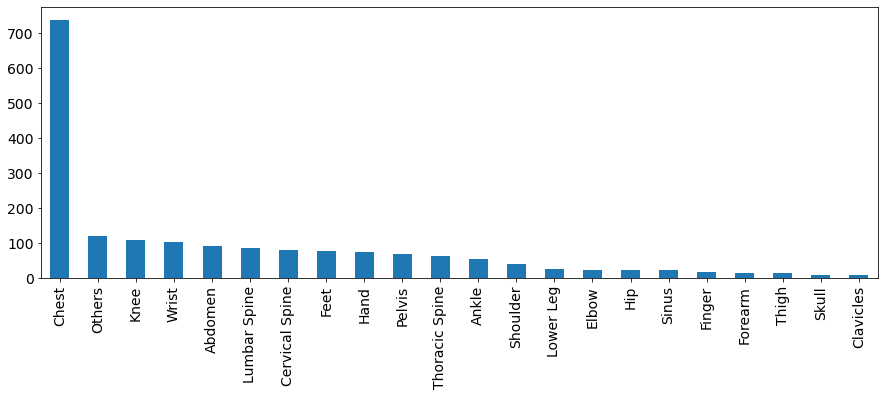

In [5]:
bodyparts = {
0 : 'Abdomen' ,
1 :'Ankle' ,
2 :'Cervical Spine',
3 : 'Chest' ,
4 :'Clavicles' ,
5 :'Elbow' ,
6 :'Feet' ,
7 : 'Finger' ,
8 : 'Forearm' ,
9 : 'Hand' ,
10 : 'Hip' ,
11 : 'Knee' ,
12 : 'Lower Leg' ,
13 : 'Lumbar Spine' ,
14 : 'Others' ,
15 :'Pelvis',
16 :'Shoulder' ,
17 :'Sinus' ,
18 : 'Skull' ,
19 : 'Thigh' ,
20 :'Thoracic Spine',
21: 'Wrist',
}

labels_num = [value.split() for value in train_df['Target']]
labels_num_flat = list(map(int, [item for sublist in labels_num for item in sublist]))
labels = ["" for _ in range(len(labels_num_flat))]
for i in range(len(labels_num_flat)):
    labels[i] = bodyparts[labels_num_flat[i]]

fig, ax = plt.subplots(figsize=(15, 5))
pd.Series(labels).value_counts().plot(kind = 'bar', fontsize=14)

In [6]:
def dcmtag2table(folder, list_of_tags):
    """
    # Create a Pandas DataFrame with the <list_of_tags> DICOM tags
    # from the DICOM files in <folder>
    # Parameters:
    #    folder (str): folder to be recursively walked looking for DICOM files.
    #    list_of_tags (list of strings): list of DICOM tags with no whitespaces.
    # Returns:
    #    df (DataFrame): table of DICOM tags from the files in folder.
    """
    list_of_tags = list_of_tags.copy()
    items = []
    table = []
    filelist = []
    print("Listing all files...")
    start = time.time()
    for root, dirs, files in os.walk(folder, topdown=False):
        for name in files:
            filelist.append(os.path.join(root, name))
        print("Time: " + str(time.time() - start))
    print("Reading files...")
    time.sleep(2)
    for _f in tqdm(filelist):
        try:
            ds = pydicom.dcmread(_f, stop_before_pixels=True)
            items = []
            items.append(_f)

            for _tag in list_of_tags:
                if _tag in ds:
                    items.append(ds.data_element(_tag).value)
                else:
                    items.append("Not found")

            table.append((items))
        except:
            print("Skipping non-DICOM: " + _f)

            
    list_of_tags.insert(0, "Filename")
    test = list(map(list, zip(*table)))
    dictone = {}

    for i, _tag in enumerate (list_of_tags):
        dictone[_tag] = test[i]

    df = pd.DataFrame(dictone)
    time.sleep(2)
    print("Finished.")
    return df

In [7]:
tags = ['PhotometricInterpretation','BitsAllocated', 'SOPInstanceUID' ]
dicom_tags_train =  dcmtag2table('E:/dataset/train', tags)

Listing all files...
Time: 0.001992940902709961
Time: 0.0030014514923095703
Time: 0.0030014514923095703
Time: 0.0030014514923095703
Time: 0.0030014514923095703
Time: 0.0030014514923095703
Time: 0.0040547847747802734
Time: 0.0040547847747802734
Time: 0.0040547847747802734
Time: 0.004990339279174805
Time: 0.004990339279174805
Time: 0.004990339279174805
Time: 0.004990339279174805
Time: 0.0060236454010009766
Time: 0.0060236454010009766
Time: 0.0060236454010009766
Time: 0.0060236454010009766
Time: 0.0060236454010009766
Time: 0.0060236454010009766
Time: 0.006989717483520508
Time: 0.006989717483520508
Time: 0.00802159309387207
Time: 0.00802159309387207
Time: 0.00802159309387207
Time: 0.00802159309387207
Time: 0.00802159309387207
Time: 0.008995532989501953
Time: 0.008995532989501953
Time: 0.008995532989501953
Time: 0.008995532989501953
Time: 0.009992599487304688
Time: 0.009992599487304688
Time: 0.009992599487304688
Time: 0.009992599487304688
Time: 0.009992599487304688
Time: 0.01098275184631347

Time: 0.18632197380065918
Time: 0.18632197380065918
Time: 0.18632197380065918
Time: 0.1872875690460205
Time: 0.1872875690460205
Time: 0.1872875690460205
Time: 0.1872875690460205
Time: 0.18828487396240234
Time: 0.18828487396240234
Time: 0.18828487396240234
Time: 0.18828487396240234
Time: 0.18928170204162598
Time: 0.18928170204162598
Time: 0.18928170204162598
Time: 0.18928170204162598
Time: 0.18928170204162598
Time: 0.1902790069580078
Time: 0.1902790069580078
Time: 0.1902790069580078
Time: 0.19127941131591797
Time: 0.19127941131591797
Time: 0.19127941131591797
Time: 0.19127941131591797
Time: 0.19127941131591797
Time: 0.19229841232299805
Time: 0.19229841232299805
Time: 0.19229841232299805
Time: 0.19229841232299805
Time: 0.19229841232299805
Time: 0.19327187538146973
Time: 0.19327187538146973
Time: 0.19327187538146973
Time: 0.19327187538146973
Time: 0.19327187538146973
Time: 0.19426941871643066
Time: 0.19426941871643066
Time: 0.19426941871643066
Time: 0.19426941871643066
Time: 0.19426941871

Time: 0.3718278408050537
Time: 0.3718278408050537
Time: 0.3718278408050537
Time: 0.3728067874908447
Time: 0.3728067874908447
Time: 0.3728067874908447
Time: 0.3728067874908447
Time: 0.3728067874908447
Time: 0.3728067874908447
Time: 0.37378931045532227
Time: 0.37378931045532227
Time: 0.37378931045532227
Time: 0.37378931045532227
Time: 0.37378931045532227
Time: 0.3748185634613037
Time: 0.3748185634613037
Time: 0.3748185634613037
Time: 0.3748185634613037
Time: 0.3758256435394287
Time: 0.3758256435394287
Time: 0.3758256435394287
Time: 0.3758256435394287
Time: 0.3758256435394287
Time: 0.3758256435394287
Time: 0.3758256435394287
Time: 0.3768138885498047
Time: 0.3768138885498047
Time: 0.3768138885498047
Time: 0.3768138885498047
Time: 0.3768138885498047
Time: 0.3778097629547119
Time: 0.3778097629547119
Time: 0.3778097629547119
Time: 0.3778097629547119
Time: 0.3778097629547119
Time: 0.3778097629547119
Time: 0.3778097629547119
Time: 0.37880706787109375
Time: 0.37880706787109375
Time: 0.3788070678

Time: 0.5593259334564209
Time: 0.5593259334564209
Time: 0.5593259334564209
Time: 0.560291051864624
Time: 0.560291051864624
Time: 0.560291051864624
Time: 0.560291051864624
Time: 0.560291051864624
Time: 0.560291051864624
Time: 0.5612893104553223
Time: 0.5612893104553223
Time: 0.5612893104553223
Time: 0.5612893104553223
Time: 0.5612893104553223
Time: 0.5622851848602295
Time: 0.5622851848602295
Time: 0.5622851848602295
Time: 0.5622851848602295
Time: 0.5622851848602295
Time: 0.5633213520050049
Time: 0.5633213520050049
Time: 0.5633213520050049
Time: 0.5633213520050049
Time: 0.5633213520050049
Time: 0.5633213520050049
Time: 0.5633213520050049
Time: 0.5643167495727539
Time: 0.5643167495727539
Time: 0.5643167495727539
Time: 0.5643167495727539
Time: 0.5643167495727539
Time: 0.5643167495727539
Time: 0.5643167495727539
Time: 0.5653119087219238
Time: 0.5653119087219238
Time: 0.5653119087219238
Time: 0.5653119087219238
Time: 0.5653119087219238
Time: 0.5663084983825684
Time: 0.5663084983825684
Time: 

100%|█████████████████████████████████████████████████████████████████████████████| 1738/1738 [00:16<00:00, 107.78it/s]


Finished.


In [8]:
dicom_tags_train.head()

,Filename,PhotometricInterpretation,BitsAllocated,SOPInstanceUID
0,E:/dataset/train\train\1\1.2.826.0.1.3680043.8...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.65452424240994805812...
1,E:/dataset/train\train\10\1.2.826.0.1.3680043....,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.29960944389705651248...
2,E:/dataset/train\train\1000\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.57792439353439709695...
3,E:/dataset/train\train\1002\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.37634180084111795685...
4,E:/dataset/train\train\1002\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.12781870272366327239...


MONOCHROME1    1659
MONOCHROME2      79
Name: PhotometricInterpretation, dtype: int64
The following images are with Photometric Interpretation MONOCHROME1


C:\Users\D. RHUTHVIK\anaconda3\lib\site-packages\pydicom\pixel_data_handlers\pillow_handler.py:238: UserWarning: The (0028,0101) 'Bits Stored' value (15-bit) doesn't match the JPEG 2000 data (16-bit). It's recommended that you change the 'Bits Stored' value
  warnings.warn(


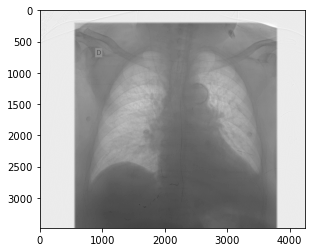

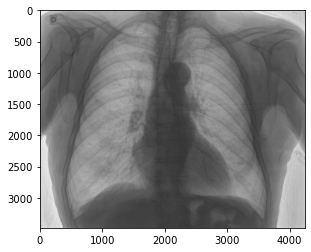

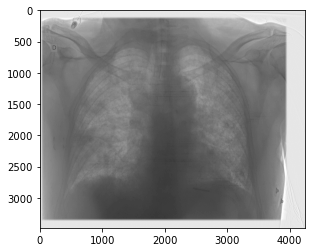

The following images are with Photometric Interpretation MONOCHROME2


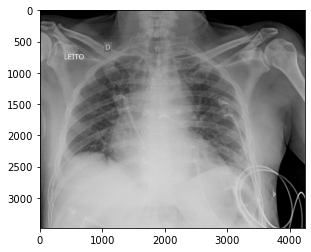

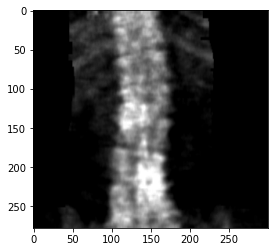

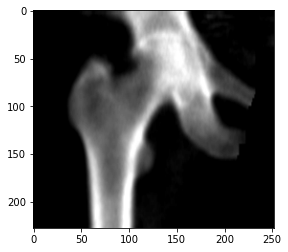

In [9]:
print(dicom_tags_train.PhotometricInterpretation.value_counts())

print('The following images are with Photometric Interpretation MONOCHROME1')
n = 0
for idx,row in dicom_tags_train[dicom_tags_train.PhotometricInterpretation == 'MONOCHROME1'].iterrows():
    dicom = pydicom.dcmread(row.Filename)
    img = dicom.pixel_array
    plt.imshow(img, cmap = 'gray')
    plt.show()
    n += 1
    if n == 3:
        break

print('The following images are with Photometric Interpretation MONOCHROME2')

n = 0
for idx, row in dicom_tags_train[dicom_tags_train.PhotometricInterpretation == 'MONOCHROME2'].iterrows():
    dicom = pydicom.dcmread(row.Filename)
    img = dicom.pixel_array
    plt.imshow(img, cmap = 'gray')
    plt.show()
    n += 1
    if n == 3:
        break

In [10]:
train = dicom_tags_train.merge(train_df, on =  'SOPInstanceUID')

In [11]:
train.head()

,Filename,PhotometricInterpretation,BitsAllocated,SOPInstanceUID,Target
0,E:/dataset/train\train\1\1.2.826.0.1.3680043.8...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.65452424240994805812...,3
1,E:/dataset/train\train\10\1.2.826.0.1.3680043....,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.29960944389705651248...,3
2,E:/dataset/train\train\1000\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.57792439353439709695...,3
3,E:/dataset/train\train\1002\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.37634180084111795685...,3
4,E:/dataset/train\train\1002\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.12781870272366327239...,3


In [12]:
label = ['Abdomen', 'Ankle', 'Cervical Spine',
       'Chest', 'Clavicles', 'Elbow', 'Feet', 'Finger', 'Forearm', 'Hand',
       'Hip', 'Knee', 'Lower Leg', 'Lumbar Spine', 'Others', 'Pelvis',
       'Shoulder', 'Sinus', 'Skull', 'Thigh', 'Thoracic Spine', 'Wrist']

In [13]:
def no_to_label(label):
    label_list_string = []
    trimed_label = label.rstrip()
    label_list = trimed_label.split(" ")
    label_list = [int(i) for i in label_list]
    for label in label_list:
        label_list_string.append(bodyparts[label])
    label_string = ' and '.join(label_list_string)
    return label_string

# Create a new column with label
target_list = train['Target'].tolist()
label_column = []

for label in tqdm(target_list):
    label_string = no_to_label(label)
    label_column.append(label_string)
train['Label'] = label_column

#Now we can see the distribution
train['Label'].unique()

100%|██████████████████████████████████████████████████████████████████████████| 1738/1738 [00:00<00:00, 695250.39it/s]


array(['Chest', 'Hand and Wrist', 'Cervical Spine', 'Pelvis', 'Knee',
       'Wrist', 'Others', 'Finger', 'Hand', 'Feet', 'Elbow', 'Ankle',
       'Lumbar Spine and Thoracic Spine', 'Thoracic Spine',
       'Lumbar Spine', 'Abdomen', 'Skull', 'Hip', 'Shoulder',
       'Finger and Hand', 'Ankle and Knee and Lower Leg',
       'Abdomen and Chest', 'Sinus', 'Lower Leg', 'Chest and Finger',
       'Thigh', 'Ankle and Lower Leg', 'Hip and Knee and Thigh',
       'Clavicles', 'Elbow and Forearm', 'Forearm', 'Abdomen and Pelvis',
       'Ankle and Feet', 'Hip and Thigh', 'Pelvis and Thigh',
       'Knee and Lower Leg', 'Forearm and Shoulder', 'Chest and Pelvis',
       'Cervical Spine and Thoracic Spine',
       'Cervical Spine and Lumbar Spine and Thoracic Spine',
       'Chest and Feet'], dtype=object)

<AxesSubplot:xlabel='Label'>

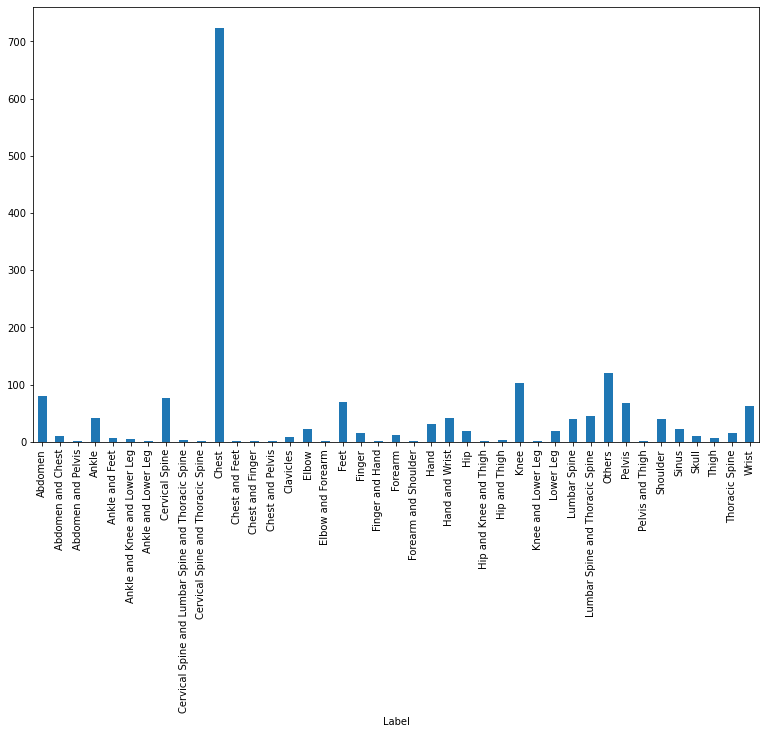

In [14]:
Grouped_target = train.groupby(by='Label').size()
%matplotlib inline
plt.rcParams["figure.figsize"] = (13,8)                              
Grouped_target.plot.bar()

In [15]:
train.Label.value_counts(normalize = True)

Chest                                                 0.416571
Others                                                0.069045
Knee                                                  0.058688
Abdomen                                               0.046030
Cervical Spine                                        0.044304
Feet                                                  0.040276
Pelvis                                                0.038550
Wrist                                                 0.036249
Lumbar Spine and Thoracic Spine                       0.025892
Hand and Wrist                                        0.024166
Ankle                                                 0.023590
Shoulder                                              0.023015
Lumbar Spine                                          0.022440
Hand                                                  0.017837
Elbow                                                 0.013234
Sinus                                                 0

In [16]:
train.Label.value_counts()

Chest                                                 724
Others                                                120
Knee                                                  102
Abdomen                                                80
Cervical Spine                                         77
Feet                                                   70
Pelvis                                                 67
Wrist                                                  63
Lumbar Spine and Thoracic Spine                        45
Hand and Wrist                                         42
Ankle                                                  41
Shoulder                                               40
Lumbar Spine                                           39
Hand                                                   31
Elbow                                                  23
Sinus                                                  23
Lower Leg                                              19
Hip           

In [17]:
v = train.Label.value_counts()
train = train[train.Label.isin(v.index[v.gt(9)])]

In [18]:
train_data=pd.read_csv('E:/dataset/traindatasplit.csv')
val_data=pd.read_csv('E:/dataset/valdatasplit.csv')

In [19]:
train_data

,Unnamed: 0,Filename,PhotometricInterpretation,BitsAllocated,SOPInstanceUID,Target,Label,Imagepath
0,655,D:/DATASET/train\train\182\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.11361844353316316839...,3,Chest,D:/DATASET/TrainingImages\1.2.826.0.1.3680043....
1,912,D:/DATASET/train\train\367\1.2.826.0.1.3680043...,MONOCHROME2,8,1.2.826.0.1.3680043.8.498.58996250760352585732...,14,Others,D:/DATASET/TrainingImages\1.2.826.0.1.3680043....
2,1482,D:/DATASET/train\train\798\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.68242369358136076091...,11,Knee,D:/DATASET/TrainingImages\1.2.826.0.1.3680043....
3,913,D:/DATASET/train\train\368\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.78505394466765816495...,6,Feet,D:/DATASET/TrainingImages\1.2.826.0.1.3680043....
4,460,D:/DATASET/train\train\1308\1.2.826.0.1.368004...,MONOCHROME2,8,1.2.826.0.1.3680043.8.498.53872432659130870989...,14,Others,D:/DATASET/TrainingImages\1.2.826.0.1.3680043....
...,...,...,...,...,...,...,...,...
1514,1629,D:/DATASET/train\train\91\1.2.826.0.1.3680043....,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.21739376742858908135...,10,Hip,D:/DATASET/TrainingImages\1.2.826.0.1.3680043....
1515,1277,D:/DATASET/train\train\644\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.97697004419340345589...,3,Chest,D:/DATASET/TrainingImages\1.2.826.0.1.3680043....
1516,553,D:/DATASET/train\train\1364\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.95707977667044248997...,8,Forearm,D:/DATASET/TrainingImages\1.2.826.0.1.3680043....
1517,1003,D:/DATASET/train\train\43\1.2.826.0.1.3680043....,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.79948565679658396979...,6,Feet,D:/DATASET/TrainingImages\1.2.826.0.1.3680043....


In [20]:
val_data.Imagepath[0]

'D:/DATASET/TrainingImages\\1.2.826.0.1.3680043.8.498.78401161739580676973623271087262413160.png'

In [21]:
d = []

In [22]:
y=set(train_data.Label)


In [23]:
y=list(y)

In [24]:
y

['Hand and Wrist',
 'Shoulder',
 'Cervical Spine',
 'Forearm',
 'Thoracic Spine',
 'Elbow',
 'Others',
 'Sinus',
 'Chest',
 'Hip',
 'Abdomen',
 'Lumbar Spine and Thoracic Spine',
 'Finger',
 'Knee',
 'Feet',
 'Lumbar Spine',
 'Pelvis',
 'Hand',
 'Wrist',
 'Skull',
 'Abdomen and Chest',
 'Ankle',
 'Lower Leg']

In [25]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y)

LabelEncoder()

In [26]:
z=le.transform(train_data.Label)

In [27]:
train_data['enum']=z

In [28]:
train_data.head()

,Unnamed: 0,Filename,PhotometricInterpretation,BitsAllocated,SOPInstanceUID,Target,Label,Imagepath,enum
0,655,D:/DATASET/train\train\182\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.11361844353316316839...,3,Chest,D:/DATASET/TrainingImages\1.2.826.0.1.3680043....,4
1,912,D:/DATASET/train\train\367\1.2.826.0.1.3680043...,MONOCHROME2,8,1.2.826.0.1.3680043.8.498.58996250760352585732...,14,Others,D:/DATASET/TrainingImages\1.2.826.0.1.3680043....,16
2,1482,D:/DATASET/train\train\798\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.68242369358136076091...,11,Knee,D:/DATASET/TrainingImages\1.2.826.0.1.3680043....,12
3,913,D:/DATASET/train\train\368\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.78505394466765816495...,6,Feet,D:/DATASET/TrainingImages\1.2.826.0.1.3680043....,6
4,460,D:/DATASET/train\train\1308\1.2.826.0.1.368004...,MONOCHROME2,8,1.2.826.0.1.3680043.8.498.53872432659130870989...,14,Others,D:/DATASET/TrainingImages\1.2.826.0.1.3680043....,16


In [29]:
for i in range(len(train_data)):
    a=train_data.Imagepath[i]
    b=a.split("TrainingImages\\")
    # y
    x="E:/dataset/trainimages/" + b[1]

    train_data.Imagepath[i]=x

C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_31088/2689092098.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.Imagepath[i]=x


In [30]:
d=[]

In [31]:
for i in range(len(train_data)):
    d.append(((train_data.Imagepath[i],int(train_data.enum[i]))))
    


In [32]:
len(d[0])

2

In [33]:
d

[('E:/dataset/trainimages/1.2.826.0.1.3680043.8.498.11361844353316316839136551826642815443.png',
  4),
 ('E:/dataset/trainimages/1.2.826.0.1.3680043.8.498.58996250760352585732567727962151664252.png',
  16),
 ('E:/dataset/trainimages/1.2.826.0.1.3680043.8.498.68242369358136076091750987392679544814.png',
  12),
 ('E:/dataset/trainimages/1.2.826.0.1.3680043.8.498.78505394466765816495956987605489957030.png',
  6),
 ('E:/dataset/trainimages/1.2.826.0.1.3680043.8.498.53872432659130870989532498565501379028.png',
  16),
 ('E:/dataset/trainimages/1.2.826.0.1.3680043.8.498.89376377506268583842387469442159590852.png',
  4),
 ('E:/dataset/trainimages/1.2.826.0.1.3680043.8.498.96657831226881023567686108100663231850.png',
  4),
 ('E:/dataset/trainimages/1.2.826.0.1.3680043.8.498.83112923097121281546280725827008329182.png',
  4),
 ('E:/dataset/trainimages/1.2.826.0.1.3680043.8.498.63172452431829321692580204742393706872.png',
  4),
 ('E:/dataset/trainimages/1.2.826.0.1.3680043.8.498.122122038846588464

In [34]:
y = le.transform(val_data.Label)

In [35]:
y

array([17, 12,  4,  4,  0,  5,  3, 16, 15, 17,  4, 12,  4, 17,  4, 14,  4,
       16,  4, 17, 11, 16,  4,  4,  4,  0,  4, 16,  4, 12,  4, 19,  4, 16,
       15,  6, 12, 20,  4,  4,  4, 19,  1, 11, 16,  4,  4,  0,  4,  3,  3,
        0,  9,  4,  4,  1, 19,  4,  4,  4,  4,  4,  4,  3,  4, 17, 12, 11,
        4,  0,  3,  4,  4,  2, 12, 22,  4,  3, 14, 16,  0, 12, 18, 12, 12,
        4,  4, 18, 18,  4,  4,  4,  4,  3,  6,  6, 16, 17,  4,  4,  7,  3,
        4,  6,  4,  4,  5, 12,  4,  4,  4,  6,  0,  4,  3,  4, 22, 17, 17,
        4,  4,  4, 12, 12,  4, 19,  9,  4,  4,  0,  6,  0,  4,  4, 22,  3,
        3, 15, 16,  4,  9,  4,  4,  4,  4,  4,  4,  4,  3,  4,  6,  4,  4,
        4,  4, 19,  4,  1, 17,  2, 14, 17,  6,  6, 10,  4,  4,  4,  4])

In [36]:
val_data["enum"] = y

In [37]:
val_data

,Unnamed: 0,Filename,PhotometricInterpretation,BitsAllocated,SOPInstanceUID,Target,Label,Imagepath,enum
0,9,D:/DATASET/train\train\1006\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.78401161739580676973...,15,Pelvis,D:/DATASET/TrainingImages\1.2.826.0.1.3680043....,17
1,36,D:/DATASET/train\train\1026\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.24274063976164182325...,11,Knee,D:/DATASET/TrainingImages\1.2.826.0.1.3680043....,12
2,44,D:/DATASET/train\train\1032\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.12955484645689261949...,3,Chest,D:/DATASET/TrainingImages\1.2.826.0.1.3680043....,4
3,50,D:/DATASET/train\train\1033\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.29846794167454514866...,3,Chest,D:/DATASET/TrainingImages\1.2.826.0.1.3680043....,4
4,58,D:/DATASET/train\train\1035\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.11479964994316715381...,0,Abdomen,D:/DATASET/TrainingImages\1.2.826.0.1.3680043....,0
...,...,...,...,...,...,...,...,...,...
164,1688,D:/DATASET/train\train\952\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.73801343511733012247...,9 21,Hand and Wrist,D:/DATASET/TrainingImages\1.2.826.0.1.3680043....,10
165,1699,D:/DATASET/train\train\960\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.12363067424206260737...,3,Chest,D:/DATASET/TrainingImages\1.2.826.0.1.3680043....,4
166,1702,D:/DATASET/train\train\961\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.77394718572820298319...,3,Chest,D:/DATASET/TrainingImages\1.2.826.0.1.3680043....,4
167,1724,D:/DATASET/train\train\985\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.12519421941347857414...,3,Chest,D:/DATASET/TrainingImages\1.2.826.0.1.3680043....,4


In [38]:
for i in range(len(val_data)):
    t=val_data.Imagepath[i]
    y=t.split('\\')
    # y
    z="E:/dataset/trainimages/" + y[1]

    val_data.Imagepath[i]=z

C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_31088/3078649235.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_data.Imagepath[i]=z


In [39]:
c = []
for i in range(len(val_data)):
    c.append(((val_data.Imagepath[i],int(val_data.enum[i]))))
    
c    

[('E:/dataset/trainimages/1.2.826.0.1.3680043.8.498.78401161739580676973623271087262413160.png',
  17),
 ('E:/dataset/trainimages/1.2.826.0.1.3680043.8.498.24274063976164182325093307898033922900.png',
  12),
 ('E:/dataset/trainimages/1.2.826.0.1.3680043.8.498.12955484645689261949928855045724356601.png',
  4),
 ('E:/dataset/trainimages/1.2.826.0.1.3680043.8.498.29846794167454514866031717663937217843.png',
  4),
 ('E:/dataset/trainimages/1.2.826.0.1.3680043.8.498.11479964994316715381867899205585900227.png',
  0),
 ('E:/dataset/trainimages/1.2.826.0.1.3680043.8.498.43786721765268283718627939510411217794.png',
  5),
 ('E:/dataset/trainimages/1.2.826.0.1.3680043.8.498.18477715115151229398156531813764076690.png',
  3),
 ('E:/dataset/trainimages/1.2.826.0.1.3680043.8.498.37351105991005007794986316489326773261.png',
  16),
 ('E:/dataset/trainimages/1.2.826.0.1.3680043.8.498.10065930002825553435161793347987832017.png',
  15),
 ('E:/dataset/trainimages/1.2.826.0.1.3680043.8.498.11207126462590105

In [40]:
image_paths, y_train = zip(*d)
image_paths_test, y_test = zip(*c)

In [41]:
des_list=[]

In [42]:
sift=cv2.SIFT_create()

In [180]:
for i in range(len(val_data)):
    t=val_data.Imagepath[i]
    y=t.split('\\')
    # y
    z="E:/dataset/trainimages/" + y[1]

    val_data.Imagepath[i]=z

C:\Users\DD1E2~1.RHU\AppData\Local\Temp/ipykernel_21524/3078649235.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_data.Imagepath[i]=z


In [175]:
train_data['path']=['s']*len(train_data)

In [178]:
train_data.Imagepath[0]

'E:/dataset/trainimages/1.2.826.0.1.3680043.8.498.11361844353316316839136551826642815443.png'

In [169]:
t=train_data.Imagepath[0]
y=t.split('\\')
# y
z="E:/dataset/trainimages/" + y[1]

z

'E:/dataset/trainimages/1.2.826.0.1.3680043.8.498.11361844353316316839136551826642815443.png'

In [43]:
im=cv2.imread(image_paths[1])

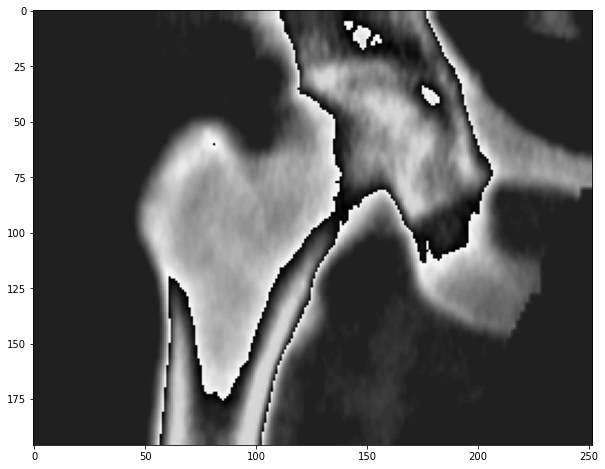

In [44]:
plt.imshow(im)

In [45]:
def draw_keypoints(vis, keypoints, color = (0, 255, 255)):
    for kp in keypoints:
            x, y = kp.pt
            plt.imshow(cv2.circle(vis, (int(x), int(y)), 2, color))

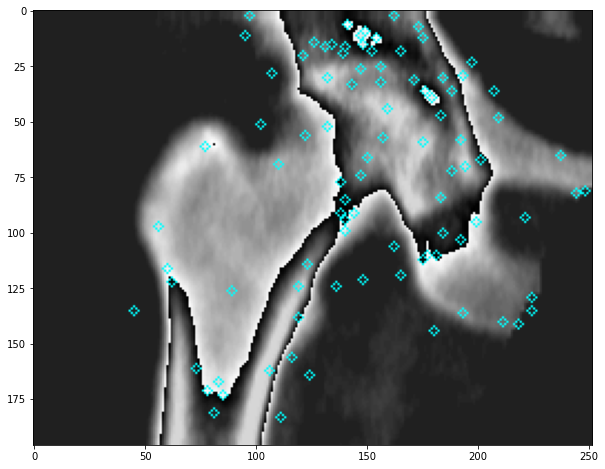

In [46]:
kp = sift.detect(im,None)
kp, des = sift.compute(im, kp)
img=draw_keypoints(im,kp)

In [47]:
for image_pat in image_paths:
    im=cv2.imread(image_pat)
    kp=sift.detect(im,None)
    keypoints,descriptor= sift.compute(im, kp)
    des_list.append((image_pat,descriptor))

In [86]:

des_list[0][1]

array([[ 24.,   9.,   8., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   6.,   7.,  21.],
       [  0.,   0.,   0., ...,   0.,   0.,   1.],
       ...,
       [  4.,   0.,   0., ...,   6.,   7.,   3.],
       [  2.,   0.,   0., ...,   0.,   0.,   0.],
       [ 68.,  42.,   8., ...,   0.,  13., 100.]], dtype=float32)

In [99]:
descriptors=des_list[0][1]
for image_path,descriptor in des_list[1:]:
    descriptors=np.vstack((descriptors,descriptor))

MemoryError: Unable to allocate 6.01 GiB for an array with shape (12594465, 128) and data type float32

In [54]:
descriptors

array([[ 24.,   9.,   8., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   6.,   7.,  21.],
       [  0.,   0.,   0., ...,   0.,   0.,   1.],
       ...,
       [  1.,   0.,   0., ...,   0.,   0.,   1.],
       [  0.,   0.,   0., ...,   0.,   3., 119.],
       [  0.,   0.,   0., ...,   1.,   0.,   1.]], dtype=float32)

In [56]:
descriptors.shape

(25135059, 128)

In [87]:
type(descriptors)

numpy.ndarray

In [63]:
for descriptor in des_list[0][1:]:
    descriptor_float = descriptor.astype(float)

In [95]:
type(descriptors)

int

In [90]:
for descriptors in range(len(descriptors)):
    desc_float = descriptors.astype(float)


AttributeError: 'int' object has no attribute 'astype'

In [67]:
from scipy.cluster.vq import kmeans,vq

In [69]:
k=200
voc,variance=kmeans(descriptor_float,k,1)

In [70]:
im_features=np.zeros((len(image_paths),k),"float32")
for i in range(len(image_paths)):
    words,distance=vq(des_list[i][1],voc)
    for w in words:
        im_features[i][w]+=1

In [71]:
from sklearn.preprocessing import StandardScaler
stdslr=StandardScaler().fit(im_features)
im_features=stdslr.transform(im_features)

In [72]:
from sklearn.svm import LinearSVC
clf=LinearSVC(max_iter=80000)
clf.fit(im_features,np.array(y_train))

C:\Users\D. RHUTHVIK\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC(max_iter=80000)

In [73]:
des_list_test=[]

In [74]:
for image_pat in image_paths_test:
    image=cv2.imread(image_pat)
    kp=sift.detect(image,None)
    keypoints_test,descriptor_test= sift.compute(image, kp)
    des_list_test.append((image_pat,descriptor_test))

In [75]:
len(image_paths_test)

169

In [83]:
len(image_paths)

1519

In [76]:
from scipy.cluster.vq import vq
test_features=np.zeros((len(image_paths_test),k),"float32")
for i in range(len(image_paths_test)):
    words,distance=vq(des_list_test[i][1],voc)
    for w in words:
        test_features[i][w]+=1

In [77]:
test_features

array([[149., 186., 297., ..., 193., 265.,  38.],
       [ 20.,   8.,  26., ...,  22.,  29.,   0.],
       [117., 180., 268., ..., 126., 362.,  49.],
       ...,
       [ 92.,  76., 177., ..., 111., 119.,  26.],
       [ 56., 230.,  98., ..., 189., 351.,  70.],
       [ 91., 155.,  98., ..., 119., 160.,  23.]], dtype=float32)

In [78]:
test_features=stdslr.transform(test_features)

In [79]:
y_test

(17,
 12,
 4,
 4,
 0,
 5,
 3,
 16,
 15,
 17,
 4,
 12,
 4,
 17,
 4,
 14,
 4,
 16,
 4,
 17,
 11,
 16,
 4,
 4,
 4,
 0,
 4,
 16,
 4,
 12,
 4,
 19,
 4,
 16,
 15,
 6,
 12,
 20,
 4,
 4,
 4,
 19,
 1,
 11,
 16,
 4,
 4,
 0,
 4,
 3,
 3,
 0,
 9,
 4,
 4,
 1,
 19,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 4,
 17,
 12,
 11,
 4,
 0,
 3,
 4,
 4,
 2,
 12,
 22,
 4,
 3,
 14,
 16,
 0,
 12,
 18,
 12,
 12,
 4,
 4,
 18,
 18,
 4,
 4,
 4,
 4,
 3,
 6,
 6,
 16,
 17,
 4,
 4,
 7,
 3,
 4,
 6,
 4,
 4,
 5,
 12,
 4,
 4,
 4,
 6,
 0,
 4,
 3,
 4,
 22,
 17,
 17,
 4,
 4,
 4,
 12,
 12,
 4,
 19,
 9,
 4,
 4,
 0,
 6,
 0,
 4,
 4,
 22,
 3,
 3,
 15,
 16,
 4,
 9,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 4,
 6,
 4,
 4,
 4,
 4,
 19,
 4,
 1,
 17,
 2,
 14,
 17,
 6,
 6,
 10,
 4,
 4,
 4,
 4)

In [80]:
y_pred=clf.predict(test_features)

In [81]:
y_pred

array([ 4,  4,  4,  4,  0,  8,  4, 16,  4, 17,  4, 12,  4,  0,  4,  4,  4,
       16,  4,  4,  6,  0,  4,  4,  3,  3,  4, 17,  4,  4,  0,  3,  4, 16,
       16,  6, 12,  4,  4,  4,  4, 16,  3, 17, 16,  4,  0,  4,  4,  3,  3,
        0,  0,  4,  4,  4, 18,  4,  4,  4,  4,  4,  4,  3,  4,  0, 12, 17,
        4,  4,  3,  4,  4,  6, 18, 22,  7,  4,  4, 21,  4, 12, 18,  5,  4,
        4,  4,  4, 16,  4,  4,  4,  4, 16,  9,  6, 16, 17,  4,  4,  9, 16,
        4,  7,  4,  4, 22, 12,  4,  2,  4,  6,  0,  4, 16,  4,  6, 16, 17,
        4,  0,  4, 12, 12,  4, 16, 10, 17,  4, 16,  6,  4,  4,  4, 16,  3,
        4, 15, 16,  4,  9,  4, 14,  4,  4,  4,  4,  4, 16,  4,  6,  4,  4,
        4,  4,  3,  4, 18,  3, 12,  4,  4,  6,  6,  9,  4,  4,  4,  4])

In [82]:
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.6035502958579881


In [100]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.30      0.33      0.32         9
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         2
           3       0.45      0.42      0.43        12
           4       0.77      0.89      0.83        75
           5       0.00      0.00      0.00         2
           6       0.70      0.78      0.74         9
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         0
           9       0.25      0.33      0.29         3
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         3
          12       0.88      0.58      0.70        12
          14       0.00      0.00      0.00         3
          15       1.00      0.33      0.50         3
          16       0.35      0.67      0.46         9
          17       0.43      0.30      0.35        10
          18       0.25    

C:\Users\D. RHUTHVIK\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\D. RHUTHVIK\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\D. RHUTHVIK\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\D. RHUTHVIK\anaconda3\lib\site-packa

In [ ]:
# # X = [[0], [1], [2], [3]]
# # y = [0, 0, 1, 1]
# from sklearn.neighbors import KNeighborsClassifier
# neigh = KNeighborsClassifier(n_neighbors=3)
# neigh.fit(X, y)

# print(neigh.predict([[1.1]]))

# print(neigh.predict_proba([[0.9]]))
